## 3.1. Linear Regression 线性回归
回归（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。 但不是所有的预测都是回归问题。 在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。

### 3.1.1. Basics 线性回归的基本元素
线性回归（linear regression）可以追溯到19世纪初， 它在回归的各种标准工具中最简单而且最流行。 线性回归基于几个简单的假设： 首先，假设自变量x和因变量y和之间的关系是线性的， 即y可以表示为x中元素的加权和，这里通常允许包含观测值的一些噪声； 其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

为了解释线性回归，我们举一个实际的例子： 我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。 为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。 这个数据集包括了房屋的销售价格、面积和房龄。 在机器学习的术语中，该数据集称为训练数据集（training data set） 或训练集（training set）。 每行数据（比如一次房屋交易相对应的数据）称为样本（sample）， 也可以称为数据点（data point）或数据样本（data instance）。 我们把试图预测的目标（比如预测房屋价格）称为标签（label）或目标（target）。 预测所依据的自变量（面积和房龄）称为特征（feature）或协变量（covariate）。

通常，我们使用n来表示数据集中的样本数量。 对索引为i的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]$，其对应的标签是$y^{(i)}$。
解释公式
- $n$：数据集中的样本数量。
- $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]$：索引为 $i$ 的样本的输入特征向量，其中 $x_1^{(i)$ 表示第 $i$ 个样本的面积，$x_2^{(i)}$ 表示第 $i$ 个样本的房龄。
- $y^{(i)}$：索引为 $i$ 的样本的标签，即第 $i$ 个样本的房价。


**线性模型**
线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：
$$price = w_{area} \times area + w_{age} \times age + b$$
其中的$w_{area}$、$w_{age}$称为权重（weight），权重决定了每个特征对我们预测值的影响。 $b$称为偏置（bias）、偏移量（offset）或截距（intercept）。 偏置是指当所有特征都取值为0时，预测值应该为多少。 即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。 如果没有偏置项，我们模型的表达能力将受到限制。 严格来说, 上面公式是输入特征的一个 仿射变换（affine transformation）。 仿射变换的特点是通过加权和对特征进行线性变换（linear transformation）， 并通过偏置项来进行平移（translation）。(上面公式中简化掉了残差项 $\epsilon$)  
给定一个数据集，我们的目标是寻找模型的权重$\mathbf{x}$和偏置$b$，使得根据模型做出的预测大体符合数据里的真实价格。 输出的预测值由输入特征通过线性模型的仿射变换决定，仿射变换由所选权重和偏置确定。
而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。 当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$（通常使用“尖角”符号表示$y$的估计值）表示为：
$$\hat{y}= w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_d \cdot x_d + b$$
将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，我们可以用点积形式来简洁地表达模型：$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b$$
在上面公式中, 向量$\mathbf{x}$对应于单个数据样本的特征。 用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$可以很方便地引用我们整个数据集的$n$个样本。 其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。
对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in  \mathbb{R}^n$可以通过矩阵-向量乘法表示为：
$$\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} + b$$

这个过程中的求和将使用numpy的广播机制。 给定训练数据特征$\mathbf{X}$和对应的已知标签$\mathbf{y}$，线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$，尽可能的使得预测值$\hat{\mathbf{y}} \approx \mathbf{y}$。 当给定从$\mathbf{X}$的同分布中取样的新样本特征时， 这组权重向量和偏置能够使得新样本预测标签的误差尽可能小。
虽然我们相信/假定给定$\mathbf{x}$和预测$y$的最佳模型会是线性的， 但我们很难找到一个有$n$个样本的真实数据集，其中对于所有的$1\leq i \le n$，$y_{(i)}$完全等于$\mathbf{w}^\top \mathbf{x}^{(i)} + b$。 因此，即使我们找到了最佳的$\mathbf{w}$和$b$，我们仍然会观察到少量的观测误差。 因此，即使确信特征与标签的潜在关系是线性的， 我们也会加入一个噪声项来考虑观测误差带来的影响。 在统计学中，这个噪声通常被假定为均值为0的正态分布。 我们假设噪声$\epsilon$与特征$x$是独立的，并且$\epsilon \sim \mathcal{N}(0, \sigma^2)$。 因此，我们可以将观测$y$建模为：$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{  或  }
\hat{\mathbf{y}} = \mathbf{X} \mathbf{w} + b + \epsilon$$

在开始寻找最好的模型参数（model parameters）$\mathbf{w}$和$b$之前，我们需要两个东西：
（1）一个模型评估指标，用来衡量模型的好坏 (模型质量的度量方式)
（2）一种能够更新模型以提高模型预测质量的方法

**Loss Function 损失函数**

在我们开始考虑如何用模型拟合（fit）数据之前，我们需要确定一个拟合程度的度量。 损失函数（loss function）能够量化目标的实际值与预测值之间的差距。 通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。 回归问题中最常用的损失函数是平方误差函数。 当样本 $i$ 的预测值为 $\hat{y}^{(i)}$ 时，平方误差可以定义为以下公式：
$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$
常数$1/2$不会带来本质的差别，但这样在形式上稍微简单一些 （因为当我们对损失函数求导后常数系数为1）。 由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。 为了进一步说明，来看下面的例子。 我们为一维情况下的回归问题绘制图像
![avatar](/Users/chenjunming/Desktop/FinTech/DeepLearning/pics/WX20240701-103657@2x.png#pic_center)
由于均方误差函数中的二次方项， 估计值$\hat{y}^{(i)}$ 和真实值$y^{(i)}$ 之间较大的差异将贡献更大的损失。 为了衡量整个数据集上的模型预测质量，我们可以计算在$n$个样本的训练集上的平均损失（也等价于求和）。
$$
\begin{aligned}
L(\mathbf{w}, b) & = \frac{1}{n} \sum_{i=1}^n l^{(i)}(\mathbf{w}, b) \\
& = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2 \\
& = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2
\end{aligned}
$$
在训练模型时，我们希望寻找一组参数$(\mathbf{w}^*, b^*)$，这组参数能够最小化在所有训练样本上的总损失。 换句话说，我们的目标是求解最小化均方误差 (MSE)：
$$
\begin{aligned}
\min_{\mathbf{w}, b} \quad & \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( \mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)} \right)^2 \\
\text{subject to} \quad & \mathbf{w} \in \mathbb{R}^d, b \in \mathbb{R}
\end{aligned}
$$

**Analytic Solution 解析解**

线性回归刚好是一个很简单的优化问题。 与我们将在本书中所讲到的其他大部分模型不同，线性回归的解可以用一个公式简单地表达出来， 这类解叫作解析解（analytical solution）。 首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。 我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X} \mathbf{w}\|^2$。 这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。 将损失关于$\mathbf{w}$的导数设为0，我们得到了解析解：$$\mathbf{w}^* = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$$

推导过程为:

- 目标, 最小化函数: $L(\mathbf{w})=\|\mathbf{y} - \mathbf{X} \mathbf{w}\|^2$
- 假设我们有 $n$ 个样本，每个样本有 $p$ 个特征：
  - $\mathbf{X}$ 是一个 $n \times (p+1)$ 的矩阵，其中每一行是一个样本的特征向量，并在最后一列加上了一个常数1，以合并偏置项 $b$。
  - $\mathbf{w}$ 是一个 $(p+1) \times 1$ 的列向量，表示模型的权重。
  - $\mathbf{y}$ 是一个 $n \times 1$ 的列向量，表示真实值。
- 展开目标函数 $$L(\mathbf{w}) = (\mathbf{y} - \mathbf{X} \mathbf{w})^\top (\mathbf{y} - \mathbf{X} \mathbf{w}) \\ L(\mathbf{w}) = \mathbf{y}^\top \mathbf{y} - 2\mathbf{y}^\top \mathbf{X} \mathbf{w} + \mathbf{w}^\top \mathbf{X}^\top \mathbf{X} \mathbf{w}$$ 
- 计算梯度, 我们需要找到使损失函数最小化的 $\mathbf{w}$。为此，我们对 $\mathbf{w}$ 求导并设导数为零：$$\nabla_{\mathbf{w}} L(\mathbf{w}) = -2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top \mathbf{X} \mathbf{w} \\ -2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top \mathbf{X} \mathbf{w} = 0$$
- 解方程: $$\mathbf{X}^\top \mathbf{X} \mathbf{w} = \mathbf{X}^\top \mathbf{y} \\ \mathbf{w}^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}$$

像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

**Minibatch Stochastic Gradient Descent 随机梯度下降**

即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。 在许多任务上，那些难以优化的模型效果要更好。 因此，弄清楚如何训练这些难以优化的模型是非常重要的。

这里, 我们用到一种名为梯度下降（gradient descent）的方法， 这种方法几乎可以优化所有深度学习模型。 它通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值） 关于模型参数的导数（在这里也可以称为梯度）。 但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。 因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本， 这种变体叫做小批量随机梯度下降（minibatch stochastic gradient descent）。首先咱们先了解下什么是梯度下降和随机梯度下降:

- 梯度下降 (Gradient Descent)
梯度下降通过以下步骤来最小化损失函数：
    1. 计算梯度：计算损失函数对模型参数的导数（梯度），表示在每个参数方向上的变化率。
    2. 更新参数：根据梯度，沿梯度负方向更新模型参数，以减少损失。
    3. 梯度下降的基本公式为：$\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w})$
    其中：
          - $\mathbf{w}$ 是模型参数。
          - $\eta$ 是学习率（控制每次更新的步长）。
          - $\nabla_{\mathbf{w}} L(\mathbf{w})$ 是损失函数 $L(\mathbf{w})$ 对参数 $\mathbf{w}$ 的梯度。 
    4. 公式解释：
          - 计算损失函数 $L(\mathbf{w})$ 对参数 $\mathbf{w}$ 的梯度 $\nabla_{\mathbf{w}} L(\mathbf{w})$。
          - 用负梯度方向更新参数 $\mathbf{w}$，即 $\mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w})$。
          - 这个过程会不断重复，直到损失函数收敛到一个最小值或者达到预设的迭代次数。
- 随机梯度下降 (Stochastic Gradient Descent, SGD)
对于大型数据集，遍历整个数据集（即使用所有样本）来计算梯度和更新参数的开销非常大。因此，引入了随机梯度下降（SGD）. SGD通过每次只使用一个样本来计算梯度并更新参数，从而大幅降低每次更新的计算开销。与标准梯度下降法不同，标准梯度下降法在每次更新时都遍历整个数据集，而随机梯度下降每次只使用一个样本。虽然随机梯度下降的更新方向受单个样本影响较大，导致更新过程波动较大，但它通常能够更快地收敛到一个较好的解。：
    1. 单样本更新：在每次参数更新时，仅使用一个样本来计算梯度并更新参数。
    2. 更新公式：$\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla_{\mathbf{w}} L^{(i)}(\mathbf{w})$
       其中 $L^{(i)}(\mathbf{w})$ 是第 $i$ 个样本的损失
    3. 虽然 SGD 可以大幅降低每次更新的计算开销，但它的更新方向受单个样本影响较大，更新过程波动较大。

小批量随机梯度下降 (Minibatch Stochastic Gradient Descent) 结合了全梯度下降和随机梯度下降的优点,在每次迭代中，我们首先随机抽样一个小批量 $\mathcal{B}$，它是由固定数量的训练样本组成的。 然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。 最后，我们将梯度乘以一个预先确定的正数$\eta$（学习率）来更新模型参数, 并从当前参数的值中减掉。

我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)$$
总结一下，算法的步骤如下： （1）初始化模型参数的值，如随机初始化； （2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。 对于平方损失和仿射变换，我们可以明确地写成如下形式: 
$$\begin{aligned} \mathbf{w} & \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_b l^{(i)}(\mathbf{w}, b) &&  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$
上面公式中的$\mathcal{w}$和$\mathcal{x}$都是向量。 在这里，更优雅的向量表示法比系数表示法 (如$w_1,w_2,\ldots,w_d$) 更具可读性。$|\mathcal{B}|$表示每个小批量中的样本数，这也称为批量大小（batch size）。$\eta$表示学习率（learning rate）。 批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。 这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。 调参（hyperparameter tuning）是选择超参数的过程。 超参数通常是我们根据训练迭代结果来调整的， 而训练迭代结果是在独立的验证数据集（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后）， 我们记录下模型参数的估计值，表示为$\hat{\mathbf{w}}$, $\hat{b}$。但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。 因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。 但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失， 这一挑战被称为泛化（generalization）。


**用模型进行预测**

给定“已学习”的线性回归模型 $\hat{\mathbf{w}}^T \mathbf{x} + \hat{b}$， 现在我们可以通过房屋面积$x_1$和房龄$x_2$来估计一个（未包含在训练数据中的）新房屋价格。 给定特征估计目标的过程通常称为预测（prediction）或推断（inference）。
之后会继续使用**预测**这个词。 虽然推断这个词已经成为深度学习的标准术语，但其实推断这个词有些用词不当。 在统计学中，推断更多地表示基于数据集估计参数。 当深度学习从业者与统计学家交谈时，术语的误用经常导致一些误解。

### 3.1.2. Vectorization for Speed 矢量化加速

在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。
为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。 我们实例化两个全为1的10000维向量。 在一种方法中，我们将使用Python的for循环遍历向量； 在另一种方法中，我们将依赖对+的调用。

In [9]:
import math
import time
from mxnet import np
from tools_func import *

n = 10000
a = np.ones([n])
b = np.ones([n])
a

array([1., 1., 1., ..., 1., 1., 1.])

我们将频繁地进行运行时间的基准测试，所以我们定义一个计时器类来方便使用。这个 Timer 类的代码放在了 tools_func.py 文件中。

In [10]:
c = np.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'2.26448 sec'

In [11]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00033 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性。

### 3.1.3. The Normal Distribution and Squared Loss 正态分布与平方损失

接下来，我们通过对噪声分布的假设来解读平方损失目标函数。

正态分布和线性回归之间的关系很密切。 正态分布（normal distribution），也称为高斯分布（Gaussian distribution）， 最早由德国数学家高斯（Gauss）应用于天文学研究。 简单的说，若随机变量$X$服从正态分布，我们可以将其表示为$x$， 其中$\mu$是均值，$\sigma$是标准差。 概率密度函数（probability density function）如下：
$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(x-\mu)^2\right)$$


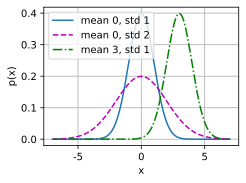

In [12]:
# 定义一个Python函数来计算正态分布。
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma ** 2 * (x - mu) ** 2)


# 使用numpy包绘制正态分布图像
x = np.arange(-7, 7, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x', ylabel='p(x)',
     legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

就像我们所看到的，改变均值会产生沿x轴的移动，增加方差将会分散分布、降低其峰值。
均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是： 我们假设了观测中包含噪声，其中噪声服从正态分布。 噪声正态分布如下式:
$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2)$$

因此，我们现在可以写出通过给定的特征$\mathbf{x}$生成标签$y$的拟然函数（likelihood function）(详细推导过程在下面代码块中介绍):
$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$$

现在，根据最大似然估计（maximum likelihood estimation），参数$\mathbf{w}$和$b$的最优值是使整个数据集的似然最大的值 (最大似然估计的推导在下面代码块中介绍)：
$$P(\mathbf{y} \mid \mathbf{X}) = \prod_{i=1}^n P(y^{(i)} \mid \mathbf{x}^{(i)})$$

根据极大似然估计法选择的估计量称为极大似然估计量。 虽然使许多指数函数的乘积最大化看起来很困难， 但是我们可以在不改变目标的前提下，通过最大化似然对数来简化。 由于历史原因，优化通常是说最小化而不是最大化。 我们可以改为最小化负对数似然 $-\log P(\mathbf{y} \mid \mathbf{X})$。 由此可以得到的数学公式是：
$$-\log P(\mathbf{y} \mid \mathbf{X}) = \frac{1}{2\sigma^2} \|\mathbf{y} - \mathbf{X} \mathbf{w} - b\|^2 + \frac{n}{2} \log(\sigma^2) + \frac{n}{2} \log(2\pi)$$

现在我们只需要假设$\sigma$是某个固定常数就可以忽略第一项， 因为第一项不依赖于$\mathbf{w}$和$b$。 现在第二项除了常数$\frac{1}{\sigma ^2}$外，其余部分和前面介绍的均方误差是一样的。 幸运的是，上面式子的解并不依赖于$\sigma$。 因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。

**正态分布的公式**

- 正态分布的概率密度函数给出为：$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

- 其中：
    - $x$ 是变量。
    - $\mu$ 是均值，确定了分布的中心位置。
    - $\sigma$ 是标准差，影响曲线的宽度。
    - $\sigma^2$ 是方差。

- 在上述公式中，系数 $\frac{1}{\sqrt{2\pi\sigma^2}}$ 被称为正态分布系数或标准化因子。这个系数的作用是确保整个概率密度函数的积分（即在整个定义范围内积分）等于1。换句话说，它确保了这个函数满足概率密度函数的基本要求，即所有可能结果的概率总和为1。

- 为什么需要正态分布的标准化因子?
    - 确保积分等于1：正态分布系数是必需的，因为没有它，函数 $\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$ 的积分不会等于1。这个系数调整了函数的高度，使得其总面积符合概率的定义。
    - 数学上的完整性：这个系数从数学上保证了分布函数是正确定义的概率分布，适合用于描述实际的随机变量。

**线性变换的性质**
- 正态分布的一个重要性质是，如果一个随机变量 $\epsilon$ 服从正态分布，那么该变量的任何线性变换也服从正态分布。具体来说，如果 $\epsilon \sim \mathcal{N}(0, \sigma^2)$，则对于任何常数 $a$ 和 $b$，
$$a\epsilon + b \sim \mathcal{N}(b, a^2\sigma^2)$$

**线性模型中的应用**
- 在线性回归模型 $y = \mathbf{w}^\top \mathbf{x} + b + \epsilon$ 中，$\epsilon$ 是一个服从正态分布的随机误差项，而 $\mathbf{w}^\top \mathbf{x} + b$ 是确定的，依赖于输入变量 $\mathbf{x}$ 但不是随机的。模型可以重写为：
\[ y = (\mathbf{w}^\top \mathbf{x} + b) + \epsilon \]

- 这里，$\mathbf{w}^\top \mathbf{x} + b$ 是 $\epsilon$ 的线性变换（实际上是平移），其中 $\mathbf{w}^\top \mathbf{x} + b$ 扮演常数 $b$ 的角色，且缩放因子 $a$ 为 1。

**$y$ 的分布**
- 由于 $\epsilon$ 的加法和常数倍性质，我们可以推导出 $y$ 的分布：
$$y \sim \mathcal{N}(\mathbf{w}^\top \mathbf{x} + b, \sigma^2)$$

- 这意味着给定 $\mathbf{x}$ 后，$y$ 服从以 $\mathbf{w}^\top \mathbf{x} + b$ 为均值、以 $\sigma^2$ 为方差的正态分布。

**$y$ 的概率密度函数**
- 因此，$y$ 的概率密度函数为：$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{1}{2\sigma^2}(y - \mathbf{w}^\top \mathbf{x} - b)^2\right)$$

**最大化似然函数**

- 最大化似然函数是一种在统计模型中用来估计模型参数的方法。这种方法的核心理念是选取那些使观测到的数据集出现概率（或“似然”）最大的参数值。在给定一组数据和一个包含未知参数的模型时，似然函数描述了这些模型参数下观测到实际数据的概率。最大化似然函数就是在所有可能的参数选择中，找到那个使似然函数取得最大值的参数。
- 数学上，如果模型参数为 $\theta$，数据集为 $y$ , 则最大化的目标是：$$\theta_{\text{MLE}} = \arg\max_\theta P(y \mid \theta)$$
- 其中，$P(y \mid \theta)$ 是在参数 $\theta$ 下观测到数据 $y$ 的概率（似然）。

**似然函数的推导**

- 假设每个数据点 $y^{(i)}$ 在给定参数 $\theta$ 和可能的预测变量 $\mathbf{x}^{(i)}$ 的条件下独立生成。对于每个单独的观测 $y^{(i)}$，我们可以定义一个条件概率 $P(y^{(i)} \mid \theta)$ 或者 $P(y^{(i)} \mid \mathbf{x}^{(i)}, \theta)$ 来描述在给定模型参数和/或特征的情况下观测到 $y^{(i)}$ 的概率。
- 当假设数据点独立时，整个数据集 $\mathbf{y} = (y^{(1)}, y^{(2)}, ..., y^{(n)})$ 出现的联合概率是每个单独数据点出现概率的乘积。这是因为独立事件发生的联合概率等于各个事件发生的概率的乘积。因此，似然函数 $P(\mathbf{y} \mid \theta)$ 定义为：$$P(\mathbf{y} \mid \theta) = \prod_{i=1}^n P(y^{(i)} \mid \theta)$$
- 在包含特征变量 $\mathbf{x}$ 的模型中，例如线性回归或逻辑回归，每个 $y^{(i)}$ 的生成依赖于相应的 $\mathbf{x}^{(i)}$。因此，单个数据点的概率可以写为 $P(y^{(i)} \mid \mathbf{x}^{(i)}, \theta)$。类似地，对整个数据集 $\mathbf{X} = (\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, ..., \mathbf{x}^{(n)})$ 和 $\mathbf{y}$，似然函数变为：$$P(\mathbf{y} \mid \mathbf{X}, \theta) = \prod_{i=1}^n P(y^{(i)} \mid \mathbf{x}^{(i)}, \theta)$$
- 这个公式表明，给定模型参数 \( \theta \) 和所有预测变量 \( \mathbf{X} \) 的情况下，观测到整个数据集 \( \mathbf{y} \) 的联合概率是每个单独条件概率的乘积。
- 在某些上下文中，尤其是当模型和参数被视为已知或固定时，人们可能会简化表达式，省略 $\theta$ ，只写：$$P(\mathbf{y} \mid \mathbf{X}) = \prod_{i=1}^n P(y^{(i)} \mid \mathbf{x}^{(i)})$$
- 这种表述假定 $\theta$ 已经固定或被内嵌到模型中，不再是变量。

**拟然对数的推导**

- 单个数据点的概率密度函数给定模型参数 $\mathbf{w}$ 和 $b$，并假设误差 $\epsilon^{(i)}$ 服从正态分布，每个观测值的概率密度函数为：
$$P(y^{(i)} \mid \mathbf{x}^{(i)}) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y^{(i)} - (\mathbf{x}^{(i)^\top} \mathbf{w} + b))^2}{2\sigma^2}\right)$$

- 由于假设各个数据点相互独立，整个数据集的联合概率密度是每个单独概率密度的乘积：
$$P(\mathbf{y} \mid \mathbf{X}) = \prod_{i=1}^n P(y^{(i)} \mid \mathbf{x}^{(i)})$$

- 将步骤 1 的单个概率密度公式代入：
$$P(\mathbf{y} \mid \mathbf{X}) = \prod_{i=1}^n \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y^{(i)} - (\mathbf{x}^{(i)^\top} \mathbf{w} + b))^2}{2\sigma^2}\right) \right)$$

- 取对数转化乘积为求和，得到对数似然：
$$\log P(\mathbf{y} \mid \mathbf{X}) = \sum_{i=1}^n \left[ \log\left(\frac{1}{\sqrt{2\pi\sigma^2}}\right) - \frac{(y^{(i)} - (\mathbf{x}^{(i)^\top} \mathbf{w} + b))^2}{2\sigma^2} \right]$$
$$\log P(\mathbf{y} \mid \mathbf{X}) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y^{(i)} - (\mathbf{x}^{(i)^\top} \mathbf{w} + b))^2$$

- 取负号简化最小化过程：
$$-\log P(\mathbf{y} \mid \mathbf{X}) = \frac{n}{2} \log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \sum_{i=1}^n (y^{(i)} - (\mathbf{x}^{(i)^\top} \mathbf{w} + b))^2$$

- 求和项可以用范数表示为：
$$-\log P(\mathbf{y} \mid \mathbf{X}) = \frac{n}{2} \log(2\pi\sigma^2) + \frac{1}{2\sigma^2} \|\mathbf{y} - \mathbf{X} \mathbf{w} - b\|^2$$

以上步骤详细解释了如何从单个数据点的正态分布假设推导出整个数据集的负对数似然函数，这是线性回归模型参数估计的基础。

### 3.1.4. Linear Regression as a Neural Network 从线性回归到深度网络

到目前为止，我们只谈论了线性模型。 尽管神经网络涵盖了更多更为丰富的模型，我们依然可以用描述神经网络的方式来描述线性模型， 从而把线性模型看作一个神经网络。 首先，我们用“层”符号来重写这个模型。

**神经网络图**
深度学习从业者喜欢绘制图表来可视化模型中正在发生的事情。下图中, 我们将线性回归模型描述为一个神经网络。 需要注意的是，该图只显示连接模式，即只显示每个输入如何连接到输出，隐去了权重和偏置的值。
![](/Users/chenjunming/Desktop/FinTech/DeepLearning/pics/WX20240701-103804@2x.png)

上图所示的神经网络中，输入为 $x_1, \dots, x_d$， 因此输入层中的输入数（或称为特征维度，feature dimensionality）为$d$。 网络的输出为$o_1$，因此输出层中的输出数是1。 需要注意的是，输入值都是已经给定的，并且只有一个计算神经元。 由于模型重点在发生计算的地方，所以通常我们在计算层数时不考虑输入层。 也就是说， 上图中神经网络的层数为1。 我们可以将线性回归模型视为仅由单个人工神经元组成的神经网络，或称为单层神经网络。

对于线性回归，每个输入都与每个输出（在本例中只有一个输出）相连， 我们将这种变换称为全连接层（fully-connected layer）或称为稠密层（dense layer）。 下一章将详细讨论由这些层组成的网络。

**Biology 生物学**

![](/Users/chenjunming/Desktop/FinTech/DeepLearning/pics/WX20240701-103827@2x.png)

在生物中，神经元是神经网络的基本单元。神经元是生物中处理信息的基本单元，每个神经元都有输入和输出，并且可以处理输入信号并产生输出信号。神经元通过树突（dendrites，输入终端）接收输入信号，轴突（axon，输出线）和轴突端子（axon terminal，输出端子） 通过突触（synapse）与其他神经元连接。在生物神经元中，树突中接收到来自其他神经元（或视网膜等环境传感器）的信息$x_i$。 该信息通过突触权重$w_i$来加权，以确定输入的影响（即，通过$x_iw_i$相乘来激活或抑制）。 来自多个源的加权输入以加权和$y=\sum_i x_iw_i$的形式汇聚在细胞核中， 然后将这些信息发送到轴突$y$中进一步处理，通常会通过$\sigma(y)$进行一些非线性处理。 之后，它要么到达目的地（例如肌肉），要么通过树突进入另一个神经元。

当然，许多这样的单元可以通过正确连接和正确的学习算法拼凑在一起， 从而产生的行为会比单独一个神经元所产生的行为更有趣、更复杂， 这种想法归功于我们对真实生物神经系统的研究。

当今大多数深度学习的研究几乎没有直接从神经科学中获得灵感。 我们援引斯图尔特·罗素和彼得·诺维格在他们的经典人工智能教科书 Artificial Intelligence:A Modern Approach (Russell and Norvig, 2016) 中所说的：虽然飞机可能受到鸟类的启发，但几个世纪以来，鸟类学并不是航空创新的主要驱动力。 同样地，如今在深度学习中的灵感同样或更多地来自数学、统计学和计算机科学。